In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv('data\PreprocessedBankChurners.csv')
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0,50,3,39,5,1,3,12691.0,777,11914.0,...,0,0,1,0,0,0,0,1,0,0
1,0,60,5,44,6,1,2,8256.0,864,7392.0,...,0,1,0,0,0,0,0,0,1,0
2,0,60,3,36,4,1,0,3418.0,0,3418.0,...,0,1,0,0,0,0,0,1,0,0
3,0,50,4,34,3,4,1,3313.0,2517,796.0,...,0,0,1,0,0,0,0,0,0,1
4,0,50,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,0,1,0,0,1,0,0


In [3]:
X = df.iloc[:, df.columns != 'Attrition_Flag']
y = df['Attrition_Flag']
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
knn = KNeighborsClassifier()
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [7]:
param_grid={'n_neighbors':np.arange(1,20)} 
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [8]:
knn_cv.best_params_

{'n_neighbors': 5}

In [9]:
knn_best_param = KNeighborsClassifier(n_neighbors=5)
knn_best_param.fit(X_train_scaled, y_train)
y_pred = knn_best_param.predict(X_test_scaled)

In [10]:
print(confusion_matrix(y_test, y_pred))

[[2068   45]
 [ 312  107]]


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2113
           1       0.70      0.26      0.37       419

    accuracy                           0.86      2532
   macro avg       0.79      0.62      0.65      2532
weighted avg       0.84      0.86      0.83      2532



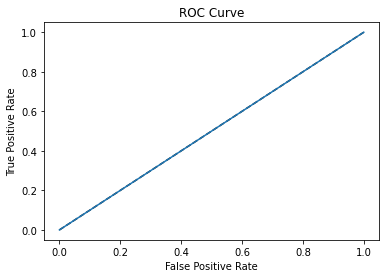

In [12]:
y_pred_prob = knn_best_param.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Gradient Boosting Case Study')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

In [13]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.5

### Same with non-standard values

In [16]:
knn_best_param = KNeighborsClassifier(n_neighbors=5)
knn_best_param.fit(X_train, y_train)
y_pred = knn_best_param.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2113
           1       0.71      0.55      0.62       419

    accuracy                           0.89      2532
   macro avg       0.81      0.75      0.78      2532
weighted avg       0.88      0.89      0.88      2532

